<a href="https://colab.research.google.com/github/madhurima99/FrostianTextGeneration/blob/main/FrostianTextGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import necessary libraries**

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np
import pandas as pd

**Download Dataset**

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"madhurimamaji","key":"xxxx............xxxx"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#change permission
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d archanghosh/robert-frost-collection

  0% 0.00/91.7k [00:00<?, ?B/s]
100% 91.7k/91.7k [00:00<00:00, 33.9MB/s]


In [ ]:
from zipfile import ZipFile
file_name = "robert-frost-collection.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


**Data preparation**

In [ ]:
dataset = pd.read_csv('robert_frost_collection.csv')
dataset.head()

,Name,Content,Collection,Year of Publication
0,NaN,NaN,NaN,NaN
1,Stopping by Woods on a Snowy Evening,Whose woods these are I think I know. \nHis ...,New Hampshire,1923.0
2,Fire and Ice,"Some say the world will end in fire,\nSome say...",New Hampshire,1923.0
3,The Aim was Song,Before man came to blow it right\nThe wind onc...,New Hampshire,1923.0
4,The Need of Being Versed in Country Things,The house had gone to bring again\nTo the midn...,New Hampshire,1923.0


In [ ]:
dataset = dataset[1:]
dataset.head()

,Name,Content,Collection,Year of Publication
1,Stopping by Woods on a Snowy Evening,Whose woods these are I think I know. \nHis ...,New Hampshire,1923.0
2,Fire and Ice,"Some say the world will end in fire,\nSome say...",New Hampshire,1923.0
3,The Aim was Song,Before man came to blow it right\nThe wind onc...,New Hampshire,1923.0
4,The Need of Being Versed in Country Things,The house had gone to bring again\nTo the midn...,New Hampshire,1923.0
5,I Will Sing You One O,It was long I lay\nAwake that night\nWishing t...,New Hampshire,1923.0


In [ ]:
dataset.shape

(108, 4)

In [ ]:
corpus = []
text = [lines for lines in dataset.Content]
for item in text:
  temp = item.split('\n')
  for i in temp:
    corpus.append(i.lower())

In [ ]:
print("Lenght of corpus: ", len(corpus))
corpus[0:10]

Lenght of corpus:  5538


['whose woods these are i think i know.   ',
 'his house is in the village though;   ',
 'he will not see me stopping here   ',
 'to watch his woods fill up with snow.   ',
 'my little horse must think it queer   ',
 'to stop without a farmhouse near   ',
 'between the woods and frozen lake   ',
 'the darkest evening of the year.   ',
 'he gives his harness bells a shake   ',
 'to ask if there is some mistake.   ']

**Tokenize**

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [ ]:
print("Input sequence: ", input_sequences.shape)
print("Predictors: ", predictors.shape)
print("Label: ",label.shape)
print("Total words: ",total_words)

Input sequence:  (37547, 20)
Predictors:  (37547, 19)
Label:  (37547, 5639)
Total words:  5639


**Model**

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
#model.add(Dropout(0.2))
model.add(LSTM(100))
#model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 19, 100)           563900    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 19, 300)           301200    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_1 (Dense)              (None, 5639)              569539    
Total params: 1,595,039
Trainable params: 1,595,039
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(predictors, label, epochs=150, verbose=1)

Epoch 1/150
1174/1174 [==============================] - 15s 13ms/step - loss: 6.8073 - accuracy: 0.0526
Epoch 2/150
1174/1174 [==============================] - 14s 12ms/step - loss: 6.3159 - accuracy: 0.0596
Epoch 3/150
1174/1174 [==============================] - 14s 12ms/step - loss: 6.0763 - accuracy: 0.0699
Epoch 4/150
1174/1174 [==============================] - 15s 12ms/step - loss: 5.8510 - accuracy: 0.0799
Epoch 5/150
1174/1174 [==============================] - 14s 12ms/step - loss: 5.6482 - accuracy: 0.0877
Epoch 6/150
1174/1174 [==============================] - 15s 13ms/step - loss: 5.4712 - accuracy: 0.0947
Epoch 7/150
1174/1174 [==============================] - 15s 13ms/step - loss: 5.3012 - accuracy: 0.1028
Epoch 8/150
1174/1174 [==============================] - 15s 13ms/step - loss: 5.1416 - accuracy: 0.1095
Epoch 9/150
1174/1174 [==============================] - 15s 13ms/step - loss: 4.9828 - accuracy: 0.1175
Epoch 10/150
1174/1174 [==============================]

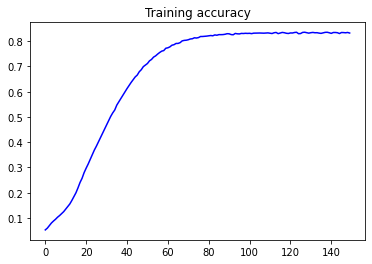

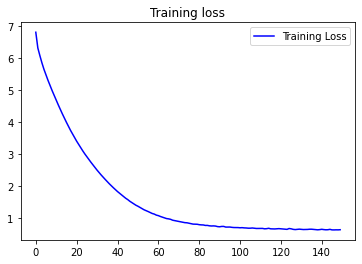

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

**Text Generation**

In [ ]:
def generate_text(seed_text, next_words, model=model, max_sequence_len=max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        #predicted = model.predict_classes(token_list, verbose=0)
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        
        output_word = ""
        for word,index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " "+output_word
    return seed_text

In [ ]:
print(generate_text("Monsoon", 15))

Monsoon cleaves the interstellar gloom full of his clothes on his hand of fay perhaps ’


In [ ]:
print(generate_text("Up above the hill", 11))

Up above the hill along the wall i'd put in ask we wish for rain


In [ ]:
print(generate_text("splendid day", 20))

splendid day light and lantern light were one to him the round of seed woods as they say ’ me all ’


In [ ]:
print(generate_text("Sunlight", 20))

Sunlight when she comes on his sleep upon the tote house bright mountains can build my room of thread something up


In [ ]:
print(generate_text("Two roads", 10))

Two roads diverged in a wood and i don’t know him good


In [ ]:
print(generate_text("Cold night", 10))

Cold night and stronger every time was fallen before the last remaining


In [ ]:
print(generate_text("grass", 30))

grass its full length old silver golden rod high urging for me ” he said he come ’ all grapes’ measured and possessed he bed back ” he said ‘i say


In [ ]:
print(generate_text("help", 30))

help me then i didn't say it’s let me ’ i said it for him ” it said it’s done our children too good something ” he child’s slowed dark with


In [ ]:
print(generate_text("Hope", 20))

Hope you wanted to restore them to their right ’ for a while corner ground it were i should be round


In [ ]:
print(generate_text("Dream", 20))

Dream upon the homes of men and farther still the light for then in a sunset myself ’ he did a


In [ ]:
print(generate_text("I wish", 10))

I wish that everything on earth were just said dark — and


In [ ]:
print(generate_text("Afternoon", 10))

Afternoon the comforting barn grows far away though all of me


In [ ]:
print(generate_text("I don't know", 15))

I don't know what part of the pasture you mean ’ i was up one ’ they say


In [ ]:
print(generate_text("It's rainy", 15))

It's rainy dead pieces give him in their grave for i don’t yet ” ” his year's


In [ ]:
print(generate_text("Sleep", 30))

Sleep of the salt wherewith they’re to be salted enough a door i’m it ’ ’ he said i ‘re ’ they’re he there cried ’ people it were all ’
